In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sympy.physics.units as u
import sympy as sp
import numpy as np
import logging as log
import functools
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
%matplotlib inline
from IPython.display import display, HTML

import importlib.util
#spec = importlib.util.spec_from_file_location("miptlabs", "/full/path/to/miptlabs.py")
#miptlabs = importlib.util.module_from_spec(spec)
#spec.loader.exec_module(miptlabs)
#ml = miptlabs

import miptlabs as ml
importlib.reload(ml)

import sys, importlib
importlib.reload(log)
log.basicConfig(level=log.INFO, format='LOG %(message)s', stream=sys.stdout)
sp.__version__

'1.1.2.dev'

In [3]:
rho_steel = ml.PQ(7.8*u.g/u.cm**3, is_const=True)
rho_glass = ml.PQ(2.5*u.g/u.cm**3, is_const=True)
g = ml.PQ(9.816*u.m/u.s**2, is_const=True)
S = ml.PQ(10*u.cm, sigma=0.1*u.cm)

In [4]:
data = pd.read_csv('lab2.2.6.csv')
#data = (data[:6])
data['d'] = data.apply(lambda row: ml.PQ(row['d']*u.mm, sigma=0.05*u.mm), axis=1)
data['t_fall_1_1'] = data.apply(lambda row: ml.PQ(row['t_fall_1_1']*u.s, sigma=0.01*u.s), axis=1)
data['t_fall_1_2'] = data.apply(lambda row: ml.PQ(row['t_fall_1_2']*u.s, sigma=0.01*u.s), axis=1)
data['t_fall_2_1'] = data.apply(lambda row: ml.PQ(row['t_fall_2_1']*u.s, sigma=0.01*u.s), axis=1)
data['t_fall_2_2'] = data.apply(lambda row: ml.PQ(row['t_fall_2_2']*u.s, sigma=0.01*u.s), axis=1)
data['t_fall_2_1'] = data['t_fall_2_1']-data['t_fall_1_1']
data['t_fall_2_2'] = data['t_fall_2_2']-data['t_fall_1_2']
data['t_fall'] = data.apply(lambda row: 
                            ml.get_mean([row['t_fall_1_1'],row['t_fall_1_2'],
                                         row['t_fall_2_1'],row['t_fall_2_2']]), axis=1)

data['T'] = data.apply(lambda row: ml.PQ(ml.celsium_to_kelvins(row['T']), sigma=0.1*u.kelvins), axis=1)
data['rho_fluid'] = data.apply(lambda row: ml.PQ(row['rho_fluid']*u.g/u.cm**3, sigma=0.01*u.g/u.cm**3), axis=1)

data['r'] = data['d']/2
data['rho_ball'] = data.apply(lambda row: rho_steel if row['material'] == 'сталь' else rho_glass, axis=1)
data['v_уст'] = data.apply(lambda row: S/row['t_fall'], axis=1)

data['eta'] = ml.pqarray(2/9*data['r']**2*g*(data['rho_ball']-data['rho_fluid'])/data['v_уст']).repr_as(u.pa*u.s)
data['Re'] = ml.pqarray(data['v_уст']*data['r']*data['rho_fluid']/data['eta']).repr_as(1)

In [5]:
data['tau'] = ml.pqarray(2/9*data['r']**2*data['rho_ball']/data['eta']).repr_as(u.s)
# Имеем t >> tau
data['S'] = ml.pqarray(data['v_уст']*data['tau'])


In [6]:
data

,material,d,t_fall_1_1,t_fall_1_2,t_fall_2_1,t_fall_2_2,T,rho_fluid,t_fall,r,rho_ball,v_уст,eta,Re,tau,S
0,стекло,2.10±0.05 millimeter (2.4%),15.680±0.010 second (0.064%),15.740±0.010 second (0.064%),16.100±0.014 second (0.088%),16.480±0.014 second (0.086%),294.45±0.10 kelvin (0.034%),1.260±0.010 gram/centimeter**3 (0.79%),16.00±0.19 second (1.2%),1.050±0.025 millimeter (2.4%),2.500000 gram/centimeter**3,0.625±0.010 centimeter/second (1.5%),0.48±0.03 pascal*second (7.0%),0.0173±0.0013 (7.5%),(12.80±1.20)*10^-4 second (9.7%),(8.0±0.8)*10^-4 centimeter (9.8%)
1,стекло,2.10±0.05 millimeter (2.4%),15.240±0.010 second (0.066%),14.990±0.010 second (0.067%),15.260±0.014 second (0.093%),15.540±0.014 second (0.091%),294.45±0.10 kelvin (0.034%),1.260±0.010 gram/centimeter**3 (0.79%),15.26±0.11 second (0.74%),1.050±0.025 millimeter (2.4%),2.500000 gram/centimeter**3,0.655±0.008 centimeter/second (1.2%),0.45±0.03 pascal*second (6.9%),0.0191±0.0014 (7.4%),(13.50±1.30)*10^-4 second (9.6%),(8.8±0.9)*10^-4 centimeter (9.7%)
2,стекло,2.10±0.05 millimeter (2.4%),15.840±0.010 second (0.063%),15.840±0.010 second (0.063%),15.630±0.014 second (0.090%),15.790±0.014 second (0.090%),294.45±0.10 kelvin (0.034%),1.260±0.010 gram/centimeter**3 (0.79%),15.78±0.05 second (0.32%),1.050±0.025 millimeter (2.4%),2.500000 gram/centimeter**3,0.634±0.007 centimeter/second (1.1%),0.47±0.03 pascal*second (6.9%),0.0178±0.0013 (7.4%),(13.00±1.30)*10^-4 second (9.6%),(8.3±0.8)*10^-4 centimeter (9.7%)
3,стекло,2.10±0.05 millimeter (2.4%),8.240±0.010 second (0.12%),8.150±0.010 second (0.12%),8.170±0.014 second (0.17%),8.410±0.014 second (0.17%),303.35±0.10 kelvin (0.033%),1.256±0.010 gram/centimeter**3 (0.80%),8.24±0.06 second (0.73%),1.050±0.025 millimeter (2.4%),2.500000 gram/centimeter**3,1.213±0.015 centimeter/second (1.2%),0.247±0.017 pascal*second (6.9%),0.065±0.005 (7.4%),(24.80±2.40)*10^-4 second (9.6%),(30.10±2.90)*10^-4 centimeter (9.7%)
4,стекло,2.10±0.05 millimeter (2.4%),5.830±0.010 second (0.17%),5.860±0.010 second (0.17%),6.230±0.014 second (0.23%),6.170±0.014 second (0.23%),313.25±0.10 kelvin (0.032%),1.251±0.010 gram/centimeter**3 (0.80%),6.02±0.10 second (1.7%),1.050±0.025 millimeter (2.4%),2.500000 gram/centimeter**3,1.66±0.03 centimeter/second (2.0%),0.181±0.013 pascal*second (7.1%),0.121±0.009 (7.8%),(3.4±0.3)*10^-3 second (9.8%),(5.6±0.6)*10^-3 centimeter (10.0%)
5,стекло,2.10±0.05 millimeter (2.4%),3.110±0.010 second (0.32%),3.150±0.010 second (0.32%),3.390±0.014 second (0.42%),3.380±0.014 second (0.42%),323.15±0.10 kelvin (0.031%),1.250±0.010 gram/centimeter**3 (0.80%),3.26±0.07 second (2.3%),1.050±0.025 millimeter (2.4%),2.500000 gram/centimeter**3,3.07±0.08 centimeter/second (2.5%),0.098±0.007 pascal*second (7.2%),0.41±0.03 (8.1%),(6.3±0.6)*10^-3 second (9.9%),0.0192±0.0020 centimeter (10%)
6,стекло,2.10±0.05 millimeter (2.4%),2.050±0.010 second (0.49%),2.140±0.010 second (0.47%),2.200±0.014 second (0.64%),2.200±0.014 second (0.64%),333.15±0.10 kelvin (0.030%),1.245±0.010 gram/centimeter**3 (0.80%),2.15±0.04 second (1.7%),1.050±0.025 millimeter (2.4%),2.500000 gram/centimeter**3,4.66±0.09 centimeter/second (2.0%),0.065±0.005 pascal*second (7.1%),0.94±0.07 (7.8%),(9.4±0.9)*10^-3 second (9.8%),0.044±0.004 centimeter (10.0%)
7,сталь,0.70±0.05 millimeter (7.1%),25.770±0.010 second (0.039%),25.740±0.010 second (0.039%),26.110±0.014 second (0.054%),26.330±0.014 second (0.054%),294.45±0.10 kelvin (0.034%),1.260±0.010 gram/centimeter**3 (0.79%),25.99±0.14 second (0.55%),0.350±0.025 millimeter (7.1%),7.800000 gram/centimeter**3,0.385±0.004 centimeter/second (1.1%),0.45±0.09 pascal*second (20%),(3.7±0.8)*10^-3 (22%),(4.70±1.30)*10^-4 second (29%),(1.8±0.5)*10^-4 centimeter (29%)
8,сталь,0.60±0.05 millimeter (8.3%),33.680±0.010 second (0.030%),33.520±0.010 second (0.030%),44.100±0.014 second (0.032%),44.300±0.014 second (0.032%),294.45±0.10 kelvin (0.034%),1.260±0.010 gram/centimeter**3 (0.79%),39±3 second (7.9%),0.300±0.025 millimeter (8.3%),7.800000 gra

[pqarray(0.0030016509079994), pqarray(0.0033961623365596876)] [-2.7500613491457049, -0.77986034310653807]
[pqarray(0.0030016509079994), pqarray(0.0033961623365596876)] [-2.9050099874135711, -0.70434914727058384]


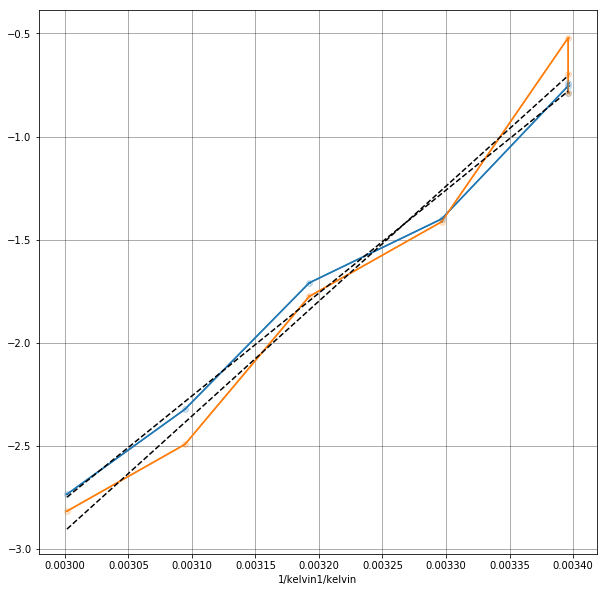

In [7]:
plt.figure(figsize=(10,10))
for material in data['material'].unique():
    #print(ml.pqarray(dat['t_fall']).val_float)
    dat = data[data['material']==material].sort_values(by='T')
    #display(dat)
    
    #ml.plt_pq(1/ml.pqarray(dat['T']), ml.pqarray(dat['eta']), plot=plt.semilogy, ols=True)
    ml.plt_pq(1/ml.pqarray(dat['T']), np.log(ml.pqarray(dat['eta']).val_float), ols=True)
plt.show()